# GROUPE 3

* Marion MOTA
* Aymeric LARVET
* Maxime D'HARBOULLE
* Julien DA CORTE
* Gwendal SIWIOREK

# Chargement des données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#pd.set_option('max_columns', None)

In [2]:
data = pd.read_csv("input/dataset.csv", ",")

D:\ESGI\5AL\ML\ML-TP\venv\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
X = data.drop("target", axis=1)
y = data["target"]

# Création des models

## Splitting des données

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (242, 13)
Test set: (61, 13)


## KNN

### Création

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# trouver le k optimal pour le nb de neighbors avant la declaration du knn ci dessous 

## Automatique
# définissons les paramètress
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)
#print(grid_knn.best_score_)
print(grid_knn.best_params_)


from sklearn.neighbors import KNeighborsClassifier

# déclaration de l'intention de knn
knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_["n_neighbors"])

# Entrainement du modèle
knn.fit(X_train, y_train)

{'metric': 'manhattan', 'n_neighbors': 19}


KNeighborsClassifier(n_neighbors=19)

### Evaluation

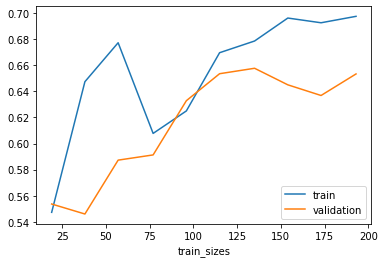

In [8]:
# Evaluation --------------

# Simple

#print('train score:', knn.score(X_train, y_train))
#print('test score:', knn.score(X_test, y_test))

from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_test_predit = knn.predict(X_test)

confusion_matrix(y_test, y_test_predit)

# calcul de la précision, du rappel et du F-score
#print(classification_report(y_test, y_test_predit))


# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()

# Courbe d'apprentissage
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Random Forest

### Création

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
# Entrainement du modèle
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Evaluation

train score: 1.0
test score: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.85      0.90      0.88        31

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<AxesSubplot:>

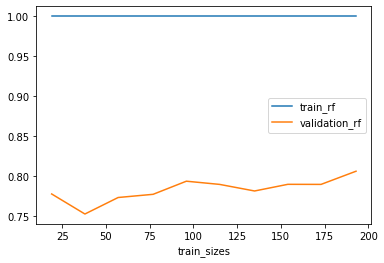

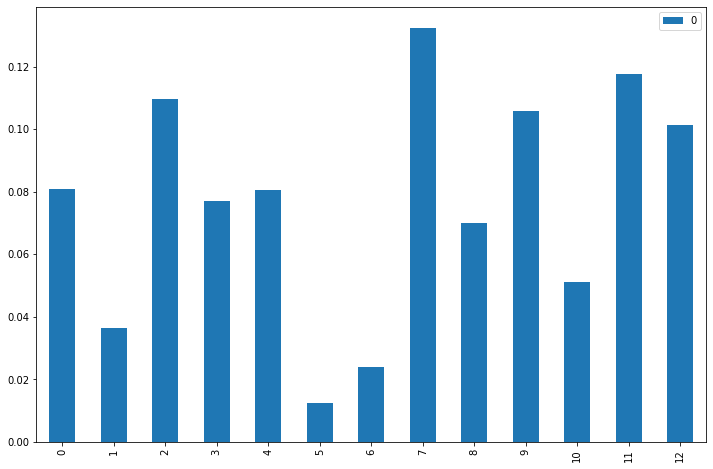

In [10]:
# Calcul de score

print('train score:', rf.score(X_train, y_train))
print('test score:', rf.score(X_test, y_test))

y_test_rf_predit = rf.predict(X_test)

N_rf, train_score_rf, val_score_rf = learning_curve(rf, X_train, y_train, 
                                                    train_sizes=np.linspace(0.1, 1, 10),
                                                    cv=5, scoring='accuracy')

confusion_matrix(y_test, y_test_rf_predit)

plt.plot(N_rf, train_score_rf.mean(axis=1), label='train_rf')
plt.plot(N_rf, val_score_rf.mean(axis=1), label='validation_rf')
plt.xlabel('train_sizes')
plt.legend()

# calcul de la précision, du rappel et du F-score
print(classification_report(y_test, y_test_rf_predit))

cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()
pd.DataFrame(rf.feature_importances_).plot.bar(figsize=(12, 8))

## Arbre de décision

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('train score:', dt.score(X_train, y_train))
print('test score:', dt.score(X_test, y_test))
y_test_dt_predit = dt.predict(X_test)

#confusion_matrix(y_test, y_test_dt_predit)

#print(classification_report(y_test, y_test_dt_predit))
from sklearn.tree import export_graphviz
FEATURE_NAMES = ["age", "sex", "cp", "trestbps", "chol", "fbs", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
#export_graphviz(dt, 'tree.dot', feature_names = FEATURE_NAMES)
!dot -Tpng tree.dot -o tree.png
import matplotlib.pyplot as plt
#import cv2 #pip install opencv-python opencv-python-headless
#%matplotlib inline
#img = cv2.imread('tree.png')
#plt.figure(figsize = (20, 20))
#plt.imshow(img)

train score: 1.0
test score: 0.8360655737704918


'dot' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


## Regression linéaire

### Création

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Entrainement
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

LinearRegression()

### Evaluation

In [14]:
# Evaluation
y_train_predict = linreg.predict(X_train_poly)
y_test_predict = linreg.predict(X_test_poly)
mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = (np.sqrt(mse_train))
r2_train = r2_score(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = (np.sqrt(mse_test))
r2_test = r2_score(y_test, y_test_predict)
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('mse du train {}'.format(mse_train), ' et test {}'.format(mse_test))
print("L'erreur quadratique moyenne du train est {}".format(rmse_train), " et test est {}".format(rmse_test))
print('le score R2 du train est {}'.format(r2_train), ' et test est {}'.format(r2_test))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
mse du train 1.1939002174575898e-23  et test 10.45775130587359
L'erreur quadratique moyenne du train est 3.4552861205080976e-12  et test est 3.2338446632257383
le score R2 du train est 1.0  et test est -40.84225011737165




# Conclusion

Nous avons vu pas mal de sur apprentissage sur les algos de classifications. Bien que nous devions appliquer des algos de classification (au vu de la target) nous avons voulu tester également un algo de regression afin de voir le comportement.

Le plus performant est l'arbre de décision dans notre cas (meilleur score) et il est plus facilement explicable. Il manque surement plus de données dans le dataset afin de mieux entrainner le model.